Room Occupancy Estimation

1.Introduction: Understanding room occupancy patterns is crucial for optimizing energy efficiency, improving building automation, and enhancing space utilization. This project focuses on performing Exploratory Data Analysis (EDA) on a room occupancy dataset that contains sensor readings such as temperature, light, sound, CO₂ levels, and motion detection. The dataset includes time-series data collected from multiple sensors, recording environmental conditions and occupancy counts. By analyzing these factors, we aim to uncover patterns, correlations, and potential outliers that influence room occupancy.

2.Goal of the Project: The primary goal of this project is to analyze room occupancy patterns using sensor data to gain insights into environmental factors influencing occupancy

3.Data Story/Source: Source of the data is from UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation

In [5]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
import os            # For file operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns            # For enhanced data visualization
from scipy import stats

In [6]:
# load the dataset
data = pd.read_csv("C:\\Users\\ARCHANA\\Documents\\Occupancy_Estimation.csv")

data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [7]:
import os
print(os.listdir())  # Lists all files in the current directory


['.ipynb_checkpoints', '70 interview qn and answers.pdf', '96cff38e-3bf4-4bd0-8ff1-3d7b5583f285 (1).jpg', '96cff38e-3bf4-4bd0-8ff1-3d7b5583f285.jpg', 'AdventureWorksDW.XLSX', 'air+quality.zip', 'Anaconda3-2024.10-1-Windows-x86_64.exe', 'ARCHANA JAYAKUMAR (1) (1).docx', 'ARCHANA JAYAKUMAR (1) (2).docx', 'ARCHANA JAYAKUMAR (1).docx', 'ARCHANA JAYAKUMAR (2).docx', 'Archana jayakumar Resume_20-May-16_16.51.51.docx', 'ARCHANA JAYAKUMAR.docx', 'archana jayakumar.png', 'Archana JayakumarResume.pdf', 'Archana Jayakumar_21-Feb-17_12.34.13.docx', 'ARCHANA+JAYAKUMAR+(1).docx', 'ARCHANA+JAYAKUMAR.docx', 'Assignment - Statistical Measures .docx', 'assignment 2 (1).pbix', 'assignment 2 (2).pbix', 'assignment 2 (3).pbix', 'assignment 2 (4).pbix', 'assignment 2 - Made with Clipchamp (1).mp4', 'assignment 2 - Made with Clipchamp (2).mp4', 'assignment 2 - Made with Clipchamp (3).mp4', 'assignment 2 - Made with Clipchamp.mp4', 'assignment 2 new.pbix', 'assignment 2.pbix', 'ASSIGNMENT 3.xlsx', 'ASSIGNMENT

4.Understand the data structure

In [9]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

5.Handle Missing Data

In [12]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


6..Handle Duplicates

In [14]:
data.duplicated().sum()

0

7.Print the shape of the dataset

In [16]:
# Print the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (10129, 19)


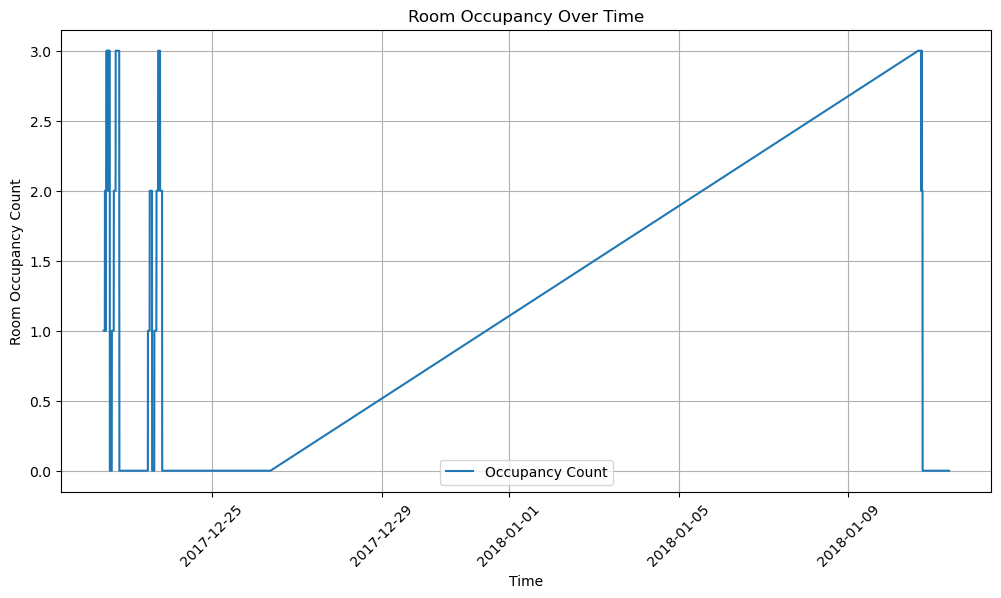

In [17]:
import matplotlib.pyplot as plt

# Convert Date and Time to datetime format for better visualization
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Plot Room Occupancy Count over time
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Room_Occupancy_Count'], label="Occupancy Count")

# Formatting
plt.xlabel("Time")
plt.ylabel("Room Occupancy Count")
plt.title("Room Occupancy Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [18]:
import pandas as pd
import numpy as np



# Select only numeric columns for outlier detection
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_cleaned = data[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]

# Print dataset shape before and after outlier removal
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_cleaned.shape)

# Save the cleaned dataset
data_cleaned.to_csv("Cleaned_Occupancy_Estimation.csv", index=False)
print("Cleaned dataset ")


Original dataset shape: (10129, 20)
Cleaned dataset shape: (5787, 20)
Cleaned dataset 


Handle outliers

In [20]:
from scipy import stats
# Define columns to check for outliers
columns_to_check = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 
                    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 
                    'S5_CO2']

# Filter out outliers using Z-score
z_scores = stats.zscore(data[columns_to_check])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_zscore_cleaned = data[filtered_entries]
# Print dataset shape before and after Z-score filtering
print("Original dataset shape:", data.shape)
print("Dataset shape after Z-score filtering:", data_zscore_cleaned.shape)
print(f"Data after Z-score filtering: {data_zscore_cleaned.shape[0]} rows")


Original dataset shape: (10129, 20)
Dataset shape after Z-score filtering: (9015, 20)
Data after Z-score filtering: 9015 rows


In [21]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute skewness
skewness_values = numeric_data.skew()

print(skewness_values)

S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64


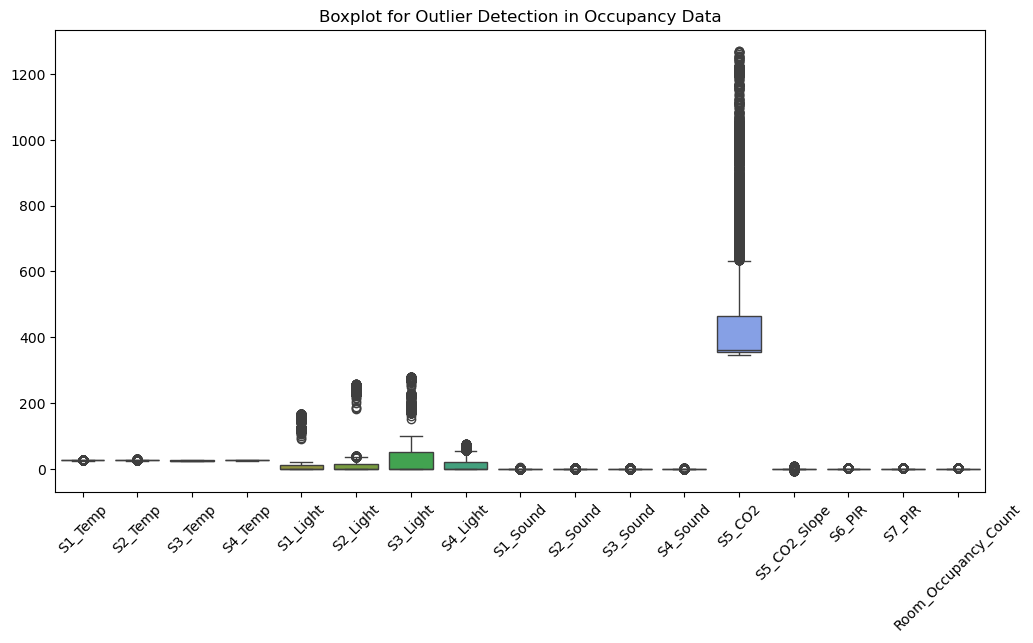

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Set plot size
plt.figure(figsize=(12, 6))

# Create boxplots
sns.boxplot(data=numeric_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title("Boxplot for Outlier Detection in Occupancy Data")
plt.show()

In [23]:
import pandas as pd

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute skewness
skewness_values = numeric_data.skew()

print(skewness_values)


S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64


In [24]:
import numpy as np

# Apply log transformation (Add 1 to avoid log(0))
data_transformed = np.log1p(data[['S2_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 
                                  'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 
                                  'S4_Sound', 'S5_CO2', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']])

# Check new skewness
print(data_transformed.skew())

S2_Temp                 2.263187
S1_Light                0.981875
S2_Light                1.087114
S3_Light                0.478124
S4_Light                0.481067
S1_Sound                3.708157
S2_Sound                4.543269
S3_Sound                4.708174
S4_Sound                6.112949
S5_CO2                  1.575527
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.822681
dtype: float64


Interpretation of Skewness After Log Transformation Reduced Skewness:

S1_Light (0.98), S2_Light (1.08), S3_Light (0.48), S4_Light (0.48), S5_CO2 (1.58), Room_Occupancy_Count (1.82)

Still Highly Skewed (>3.0):

S1_Sound (3.71), S2_Sound (4.54), S3_Sound (4.71), S4_Sound (6.11)

S6_PIR (2.86), S7_PIR (3.11), S2_Temp (2.26)



In [26]:
print(data.dtypes)

Date                            object
Time                            object
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
Datetime                datetime64[ns]
dtype: object


In [27]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [28]:
print(data.columns)

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count', 'Datetime'],
      dtype='object')


In [29]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Select only numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Ensure all values are positive
for col in data_numeric.columns:
    min_value = data_numeric[col].min()
    if min_value <= 0:  # If any value is 0 or negative, shift it
        data_numeric[col] = data_numeric[col] + abs(min_value) + 1

# Apply Box-Cox transformation
data_boxcox = data_numeric.copy()
for col in data_numeric.columns:
    data_boxcox[col], _ = boxcox(data_numeric[col])  # No need to add 1 now

# Check skewness
print(data_boxcox.skew())

S1_Temp                 0.000000
S2_Temp                 0.000000
S3_Temp                 0.000000
S4_Temp                 0.000000
S1_Light                0.530023
S2_Light                0.504801
S3_Light                0.339625
S4_Light                0.343497
S1_Sound                0.880594
S2_Sound                0.739027
S3_Sound                0.846520
S4_Sound                0.124903
S5_CO2                  0.000000
S5_CO2_Slope            0.402710
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.601268
dtype: float64


In [30]:
data_boxcox["S6_PIR"] = np.log1p(data_numeric["S6_PIR"])
data_boxcox["S7_PIR"] = np.log1p(data_numeric["S7_PIR"])
data_boxcox["Room_Occupancy_Count"] = np.log1p(data_numeric["Room_Occupancy_Count"])


In [31]:
data_boxcox.skew()

S1_Temp                 0.000000
S2_Temp                 0.000000
S3_Temp                 0.000000
S4_Temp                 0.000000
S1_Light                0.530023
S2_Light                0.504801
S3_Light                0.339625
S4_Light                0.343497
S1_Sound                0.880594
S2_Sound                0.739027
S3_Sound                0.846520
S4_Sound                0.124903
S5_CO2                  0.000000
S5_CO2_Slope            0.402710
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.887360
dtype: float64

In [32]:
# Check the first few rows
print(data.head())

# Check data types and missing values
print(data.info())

# Summary statistics
print(data.describe())


        Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0 2017-12-22  10:49:41    24.94    24.75    24.56    25.38       121   
1 2017-12-22  10:50:12    24.94    24.75    24.56    25.44       121   
2 2017-12-22  10:50:42    25.00    24.75    24.50    25.44       121   
3 2017-12-22  10:51:13    25.00    24.75    24.56    25.44       121   
4 2017-12-22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  \
0     390      0.769231       0       0            

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
Datetime                0
dtype: int64


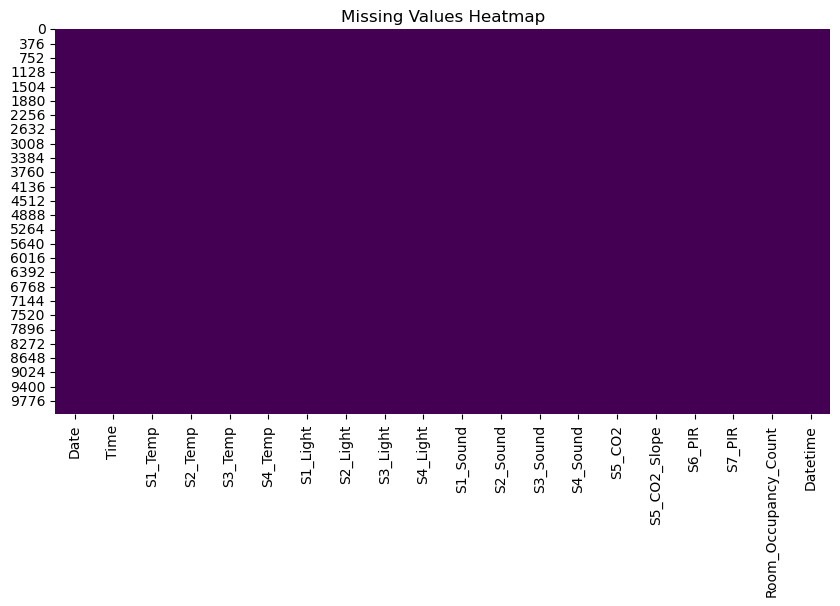

In [33]:
#Missing Values Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values count
print(data.isnull().sum())

# Visualizing missing values
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


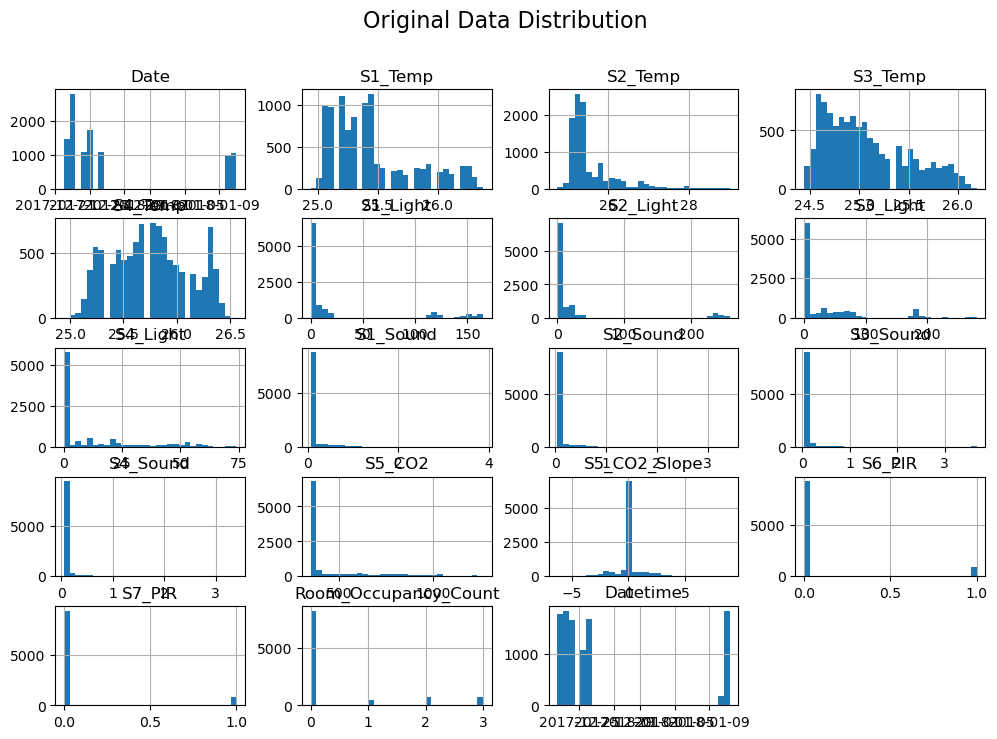

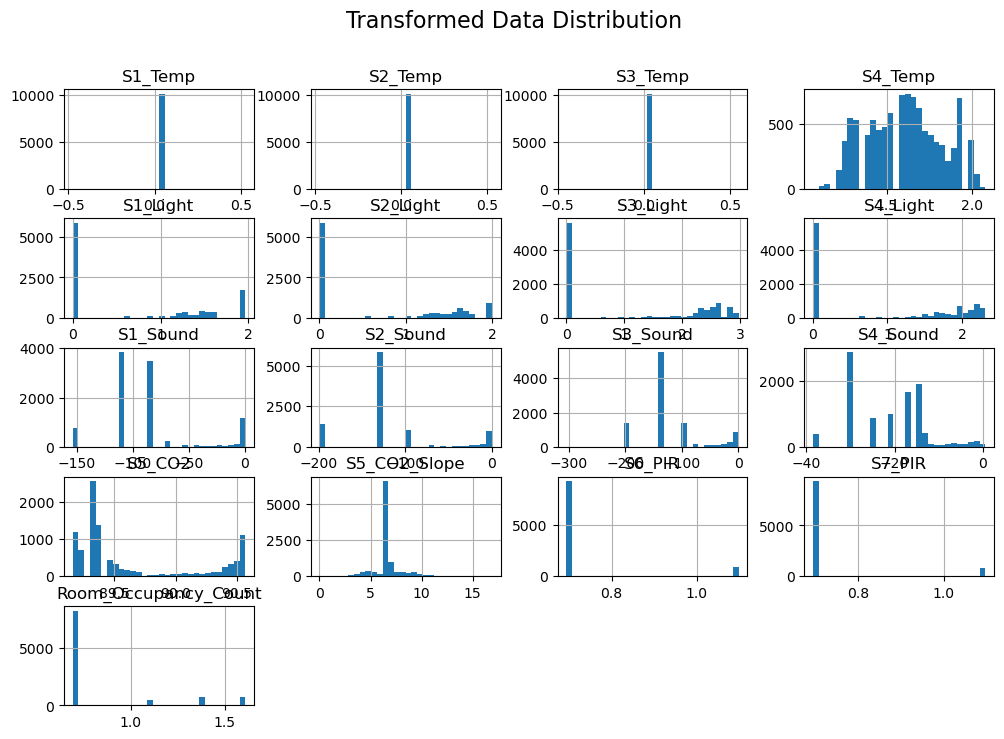

In [34]:
#Visualizing Distributions (Before & After Transformation)
# Histograms for original data
data.hist(figsize=(12,8), bins=30)
plt.suptitle("Original Data Distribution", fontsize=16)
plt.show()

# Histograms for transformed data
data_boxcox.hist(figsize=(12,8), bins=30)
plt.suptitle("Transformed Data Distribution", fontsize=16)
plt.show()


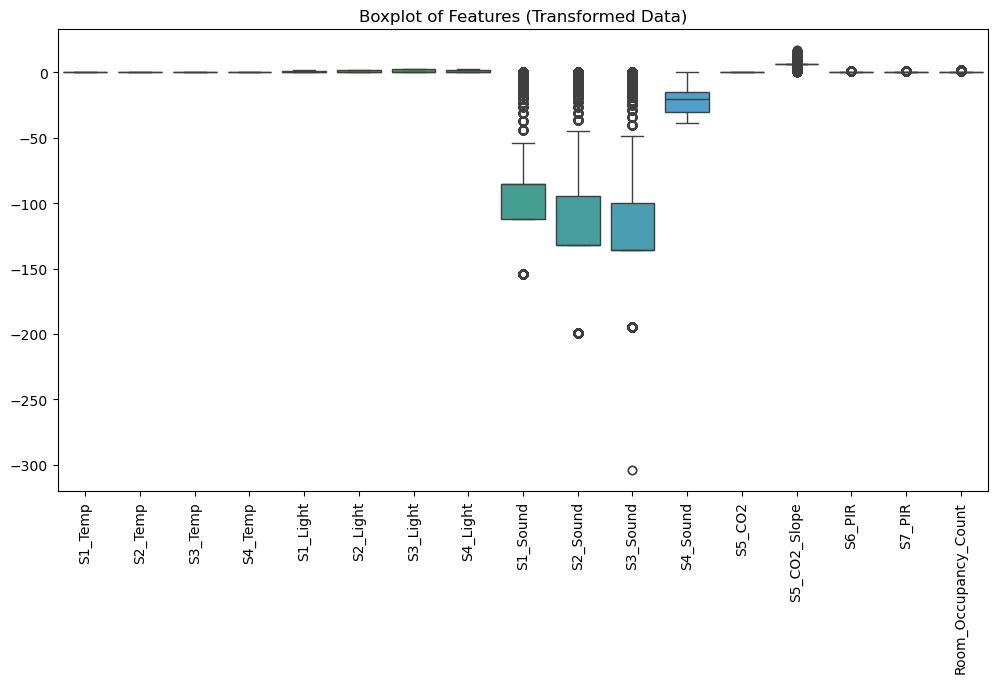

In [35]:
#Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=data_boxcox)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Transformed Data)")
plt.show()


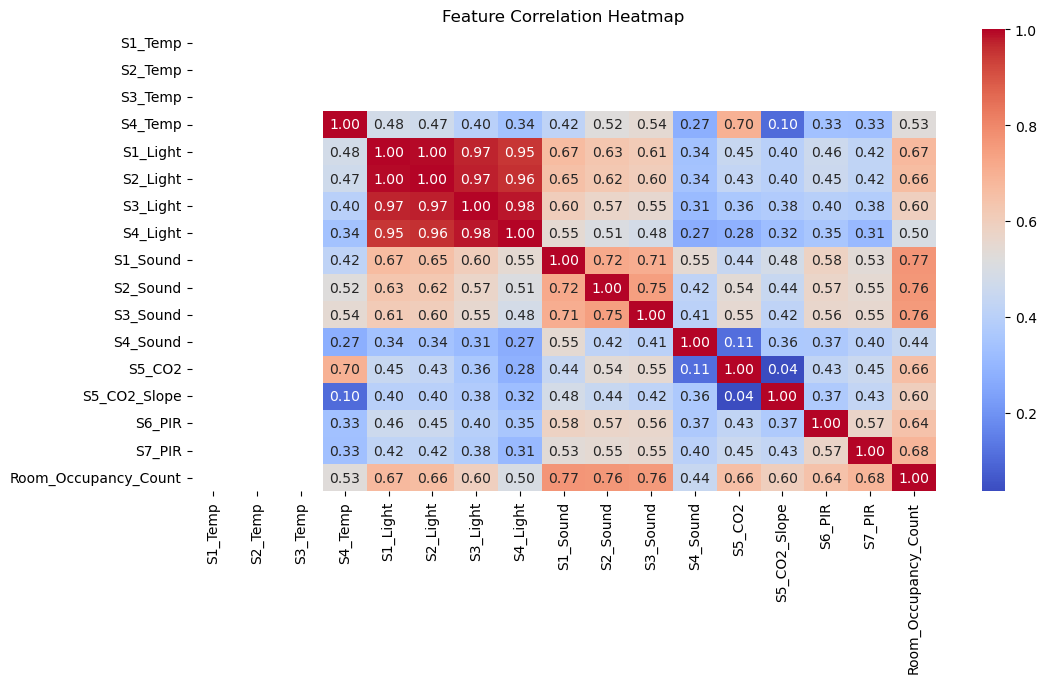

In [36]:
#Correlation Analysis
# Heatmap of correlations
plt.figure(figsize=(12,6))
sns.heatmap(data_boxcox.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

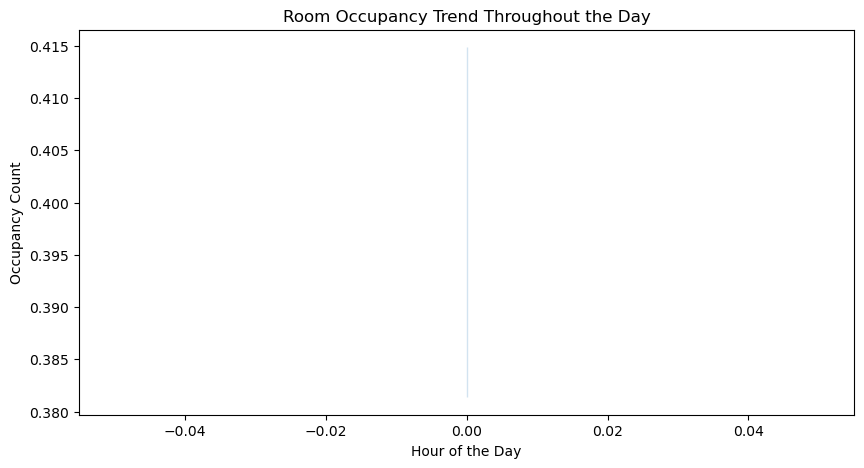

In [37]:
#Occupancy Trends Over Time
data["Date"] = pd.to_datetime(data["Date"])
data["Hour"] = data["Date"].dt.hour

plt.figure(figsize=(10,5))
sns.lineplot(x="Hour", y="Room_Occupancy_Count", data=data)
plt.title("Room Occupancy Trend Throughout the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Occupancy Count")
plt.show()


Occupancy Trends If plotted over time: Occupancy fluctuates with hours of the day (e.g., peak times in morning/afternoon). PIR sensor activity aligns with occupancy changes. CO2 levels may rise in occupied periods.

Univariate Analysis 

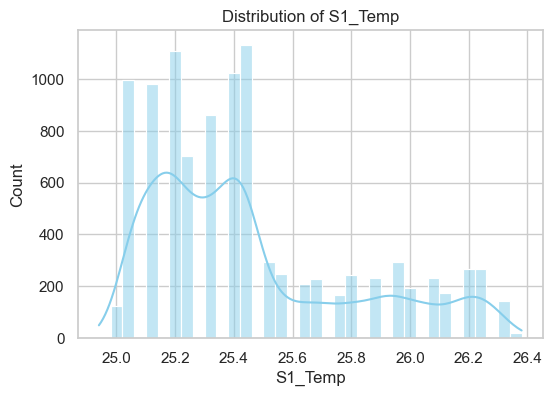

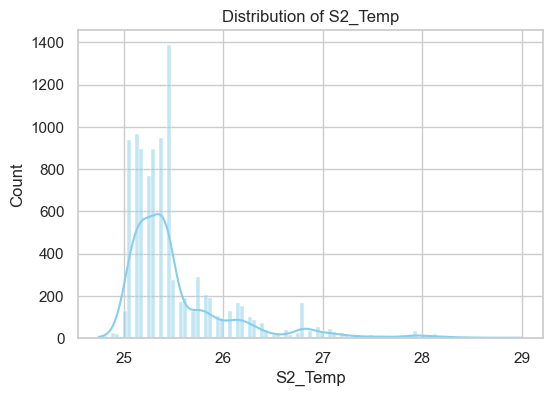

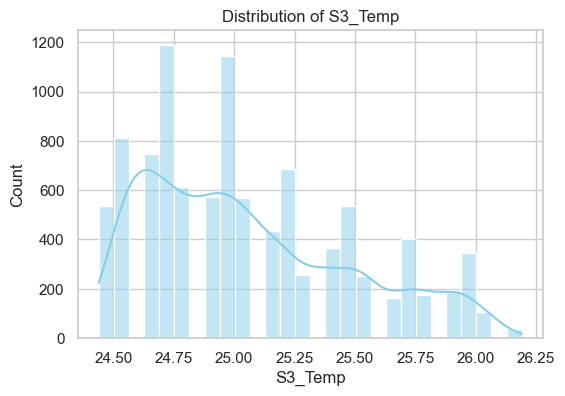

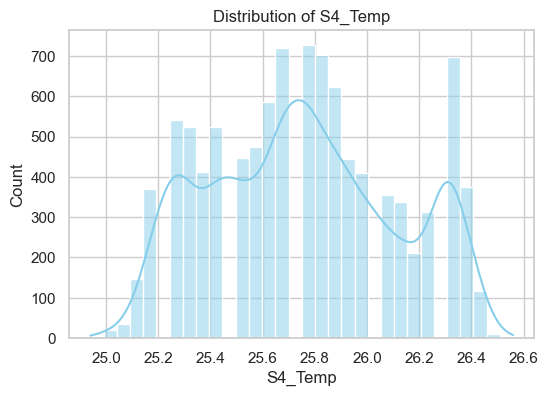

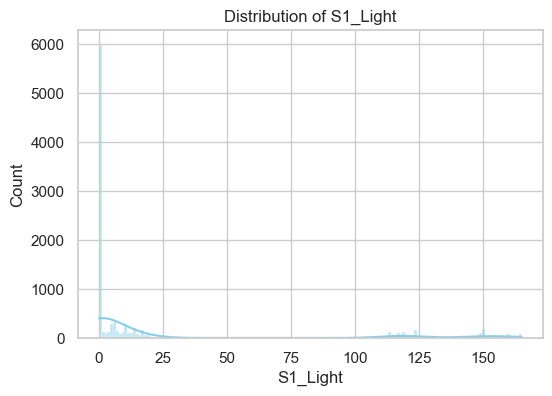

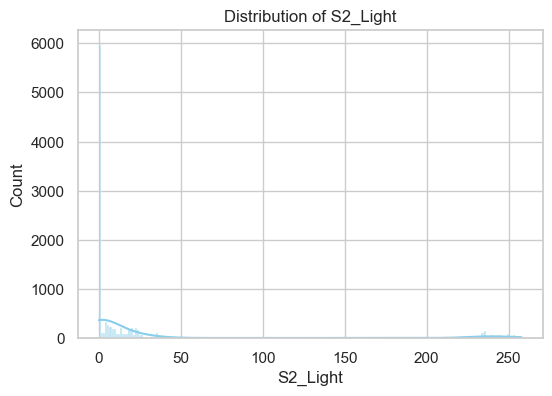

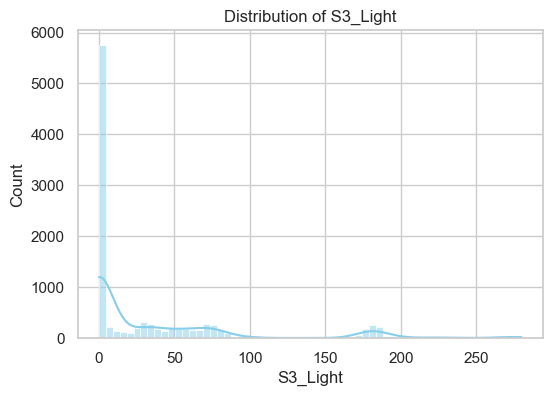

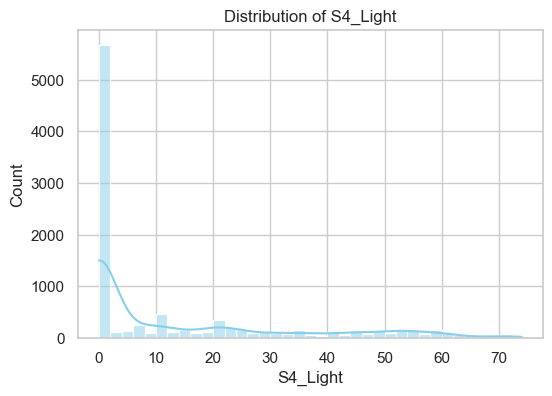

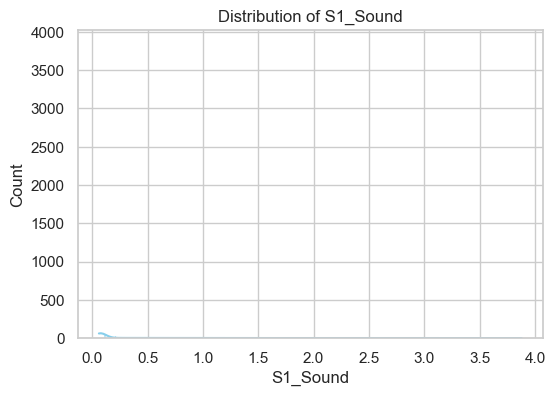

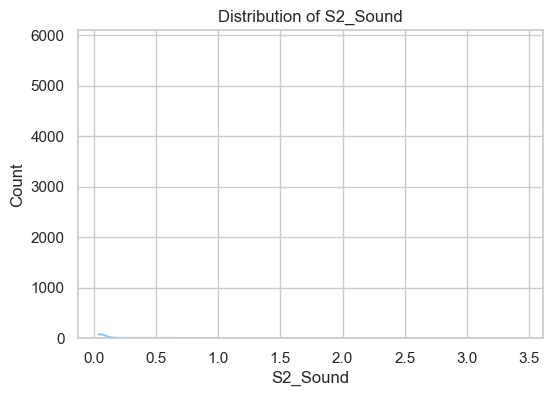

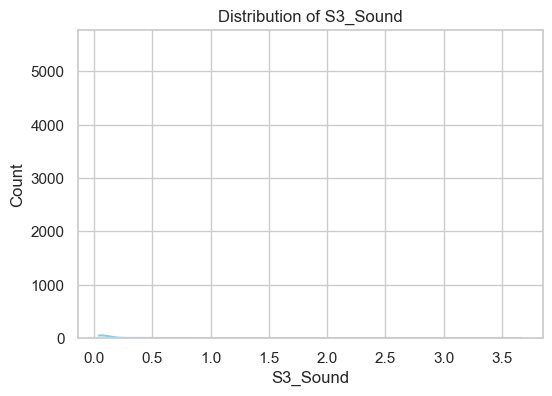

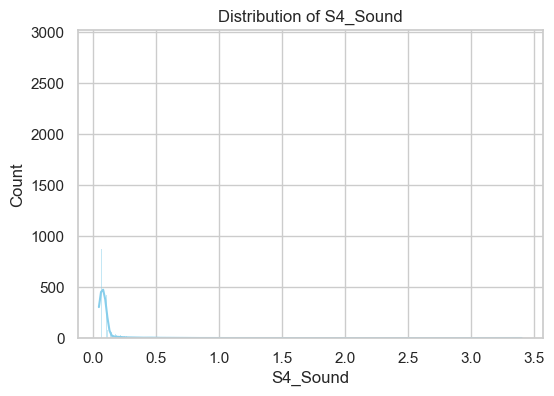

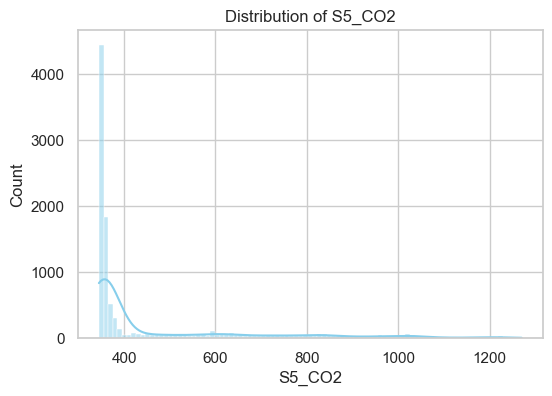

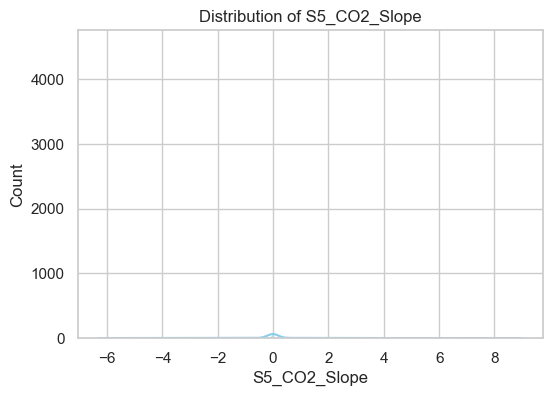

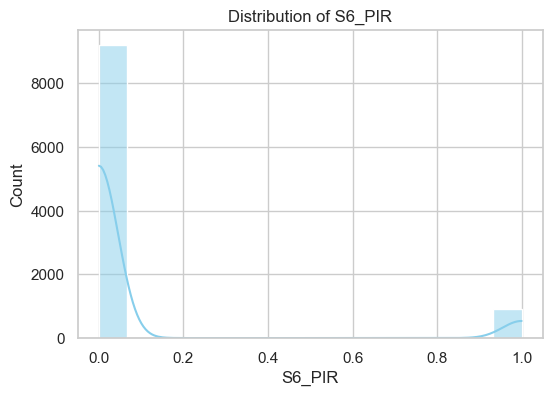

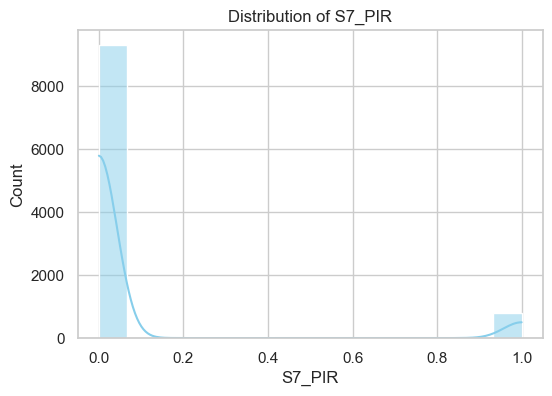

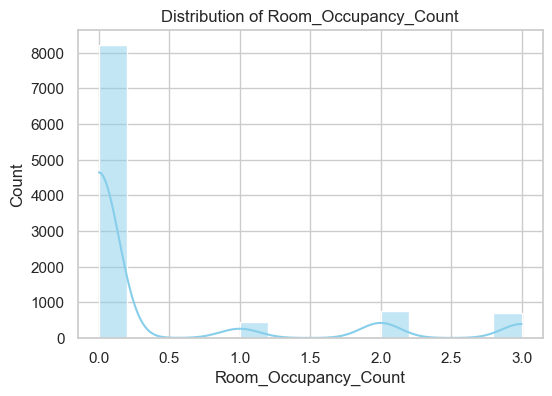

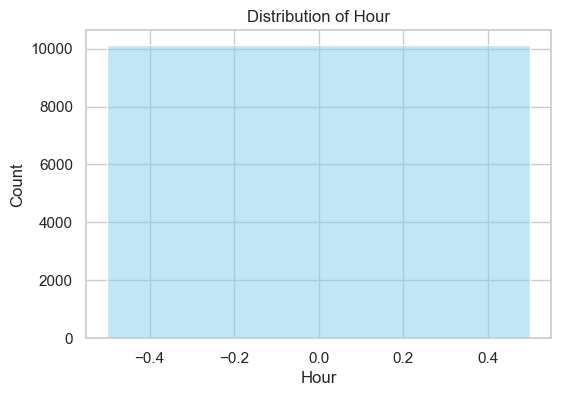

NameError: name 'df' is not defined

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Example: Histograms for numerical features
numerical_cols = data.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()
    
# Example: Count plots for categorical features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Count of categories in {col}')
    plt.xticks(rotation=45)
    plt.show()


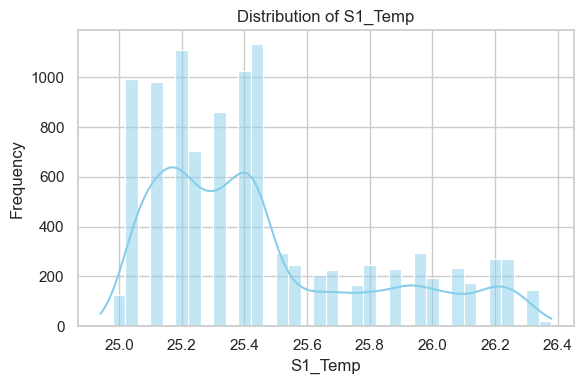

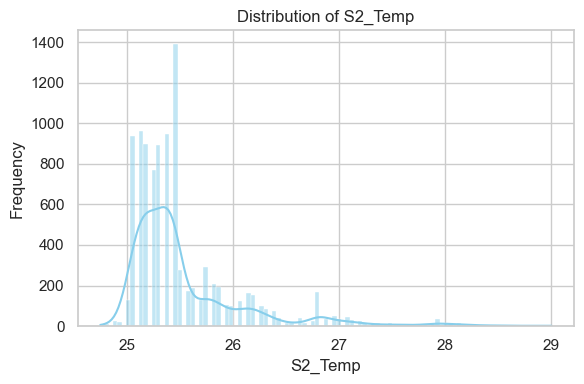

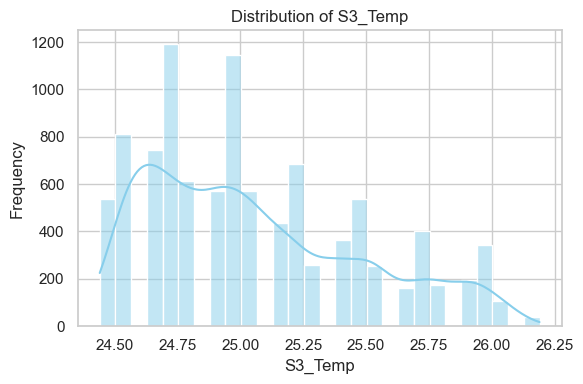

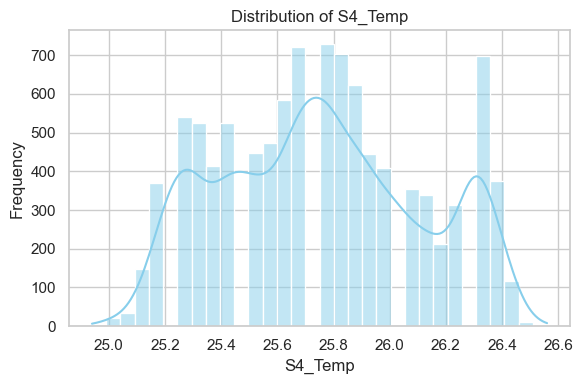

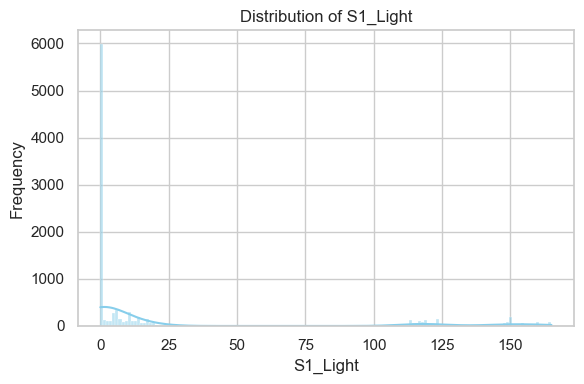

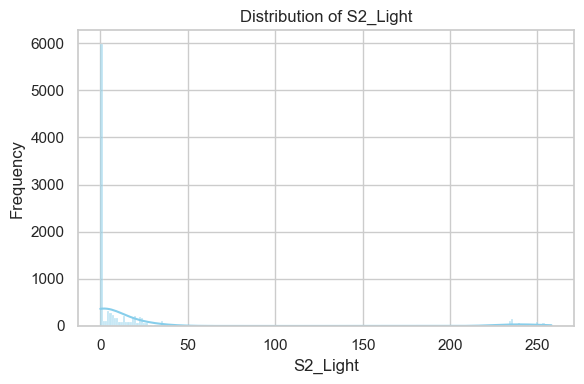

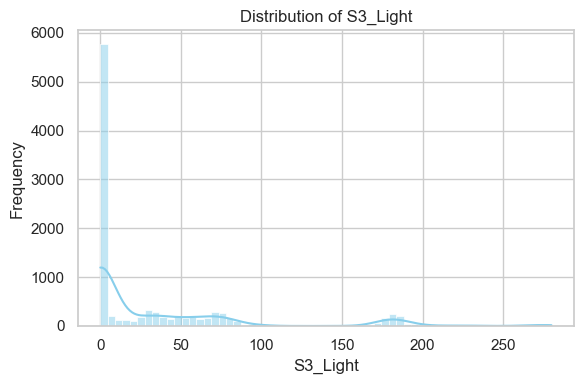

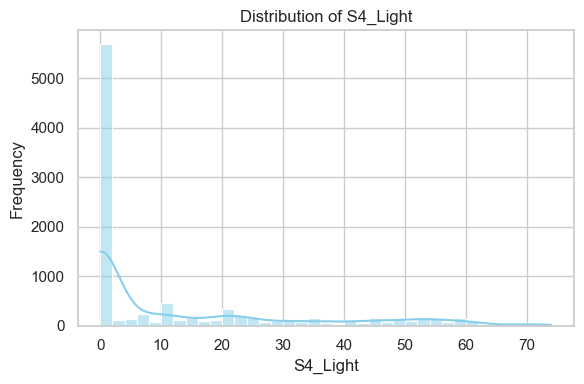

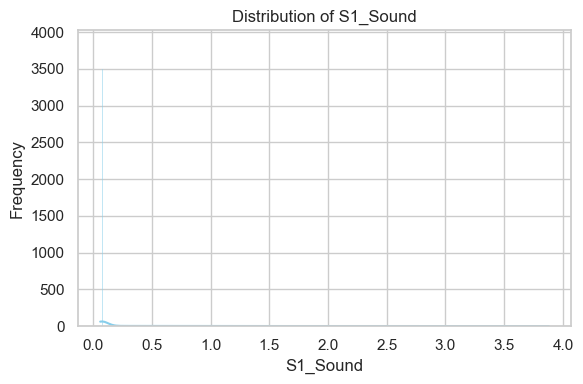

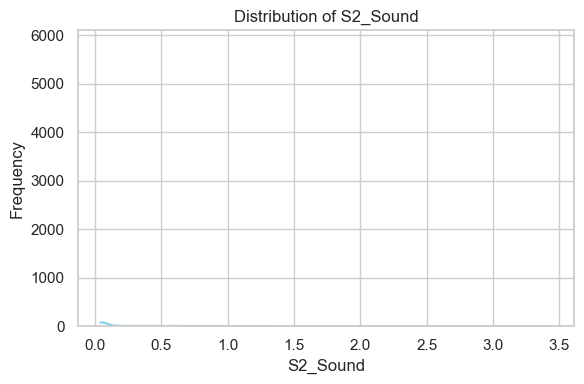

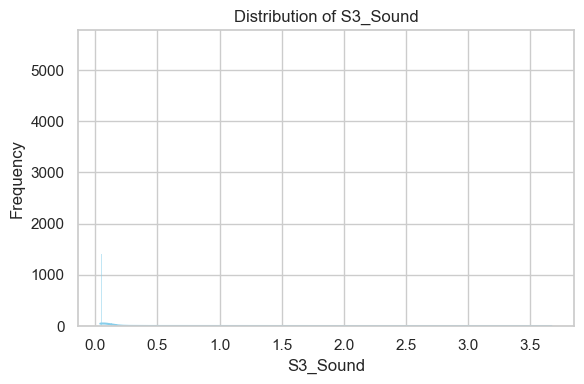

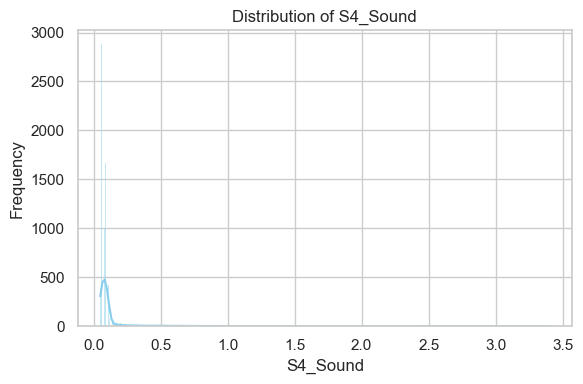

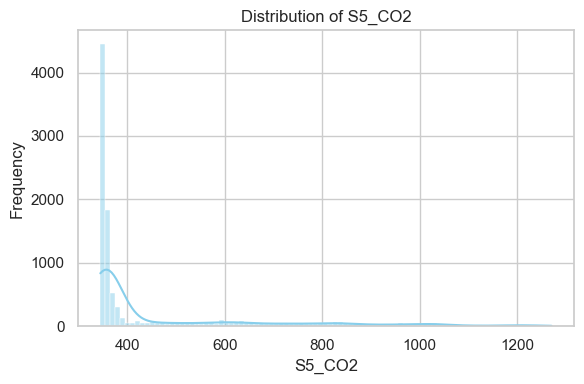

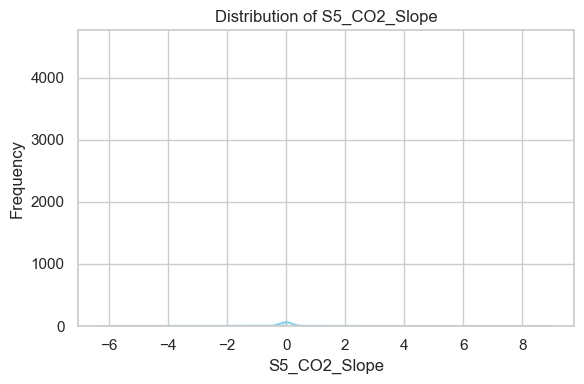

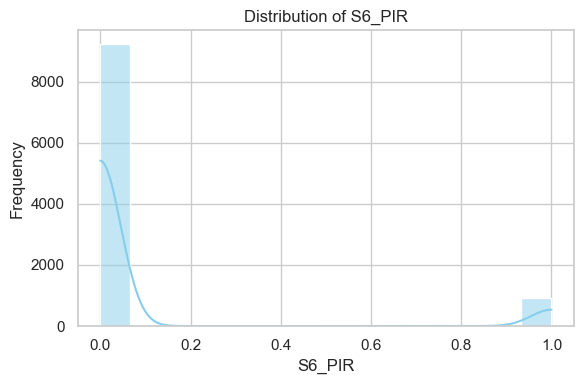

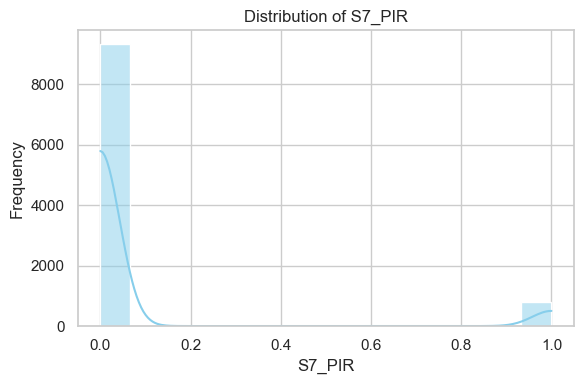

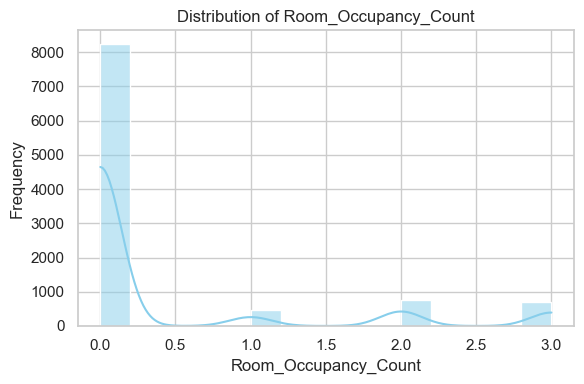

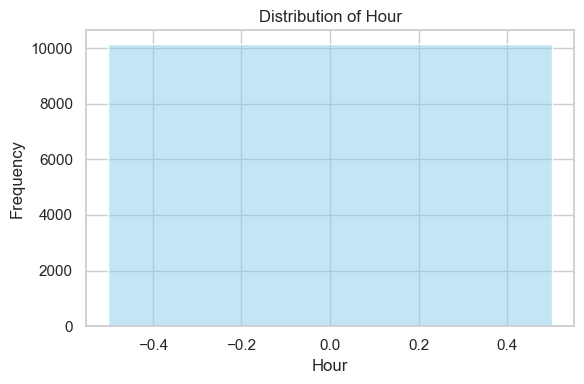

In [51]:
# histogram for numerical features


numerical_cols = data.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 Boxplots for Numerical Features
 

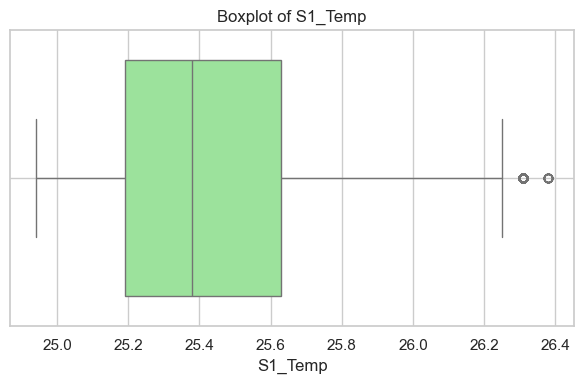

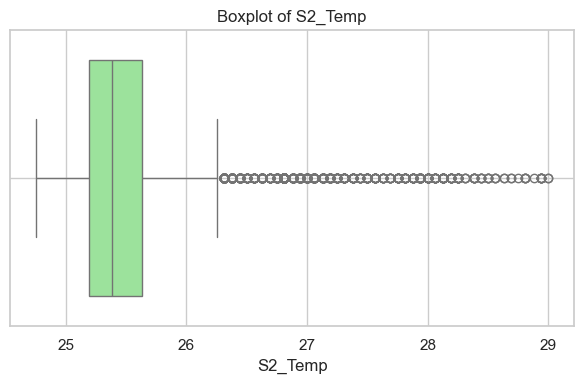

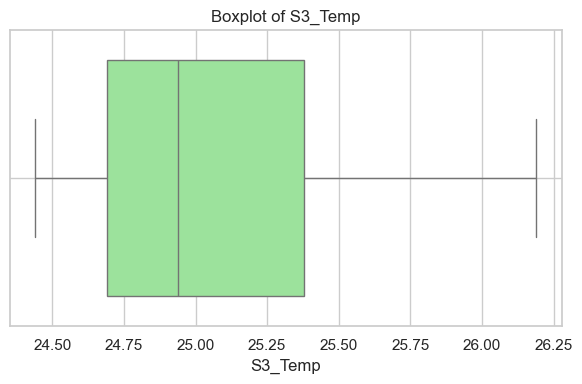

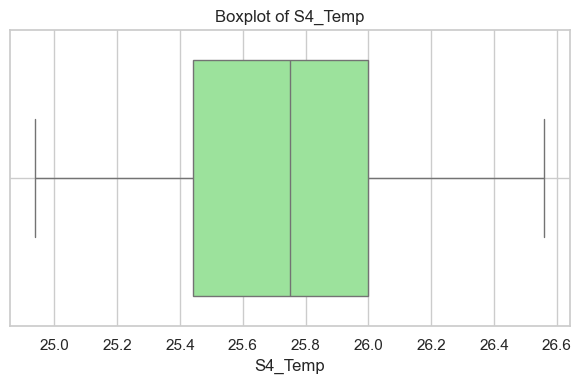

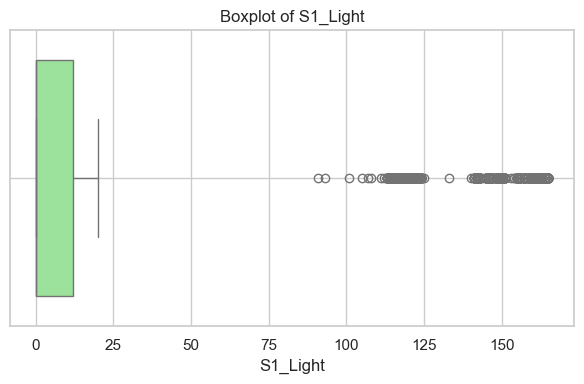

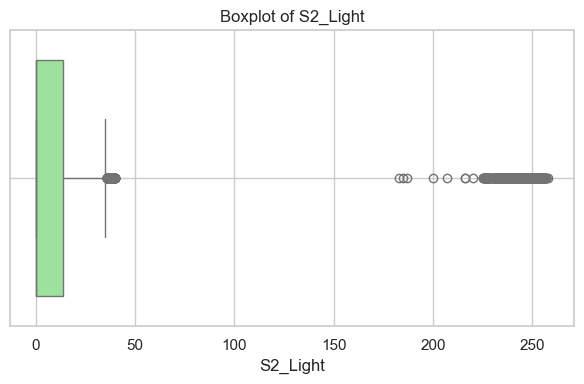

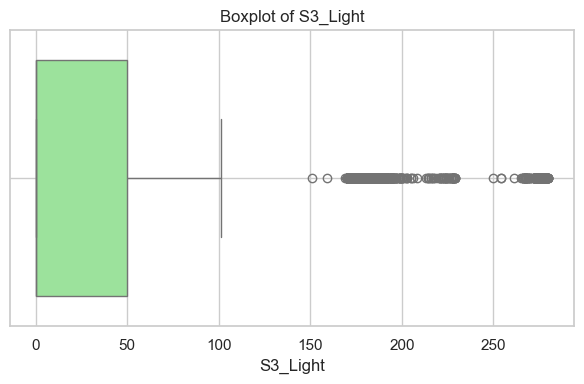

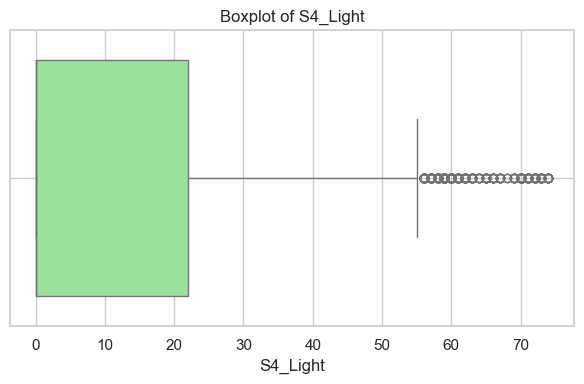

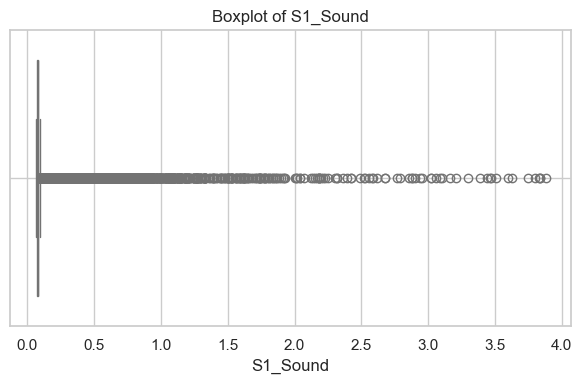

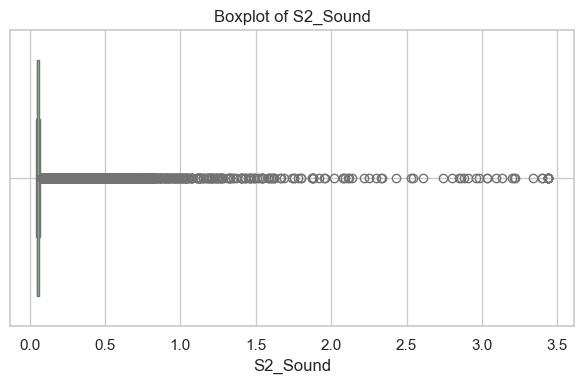

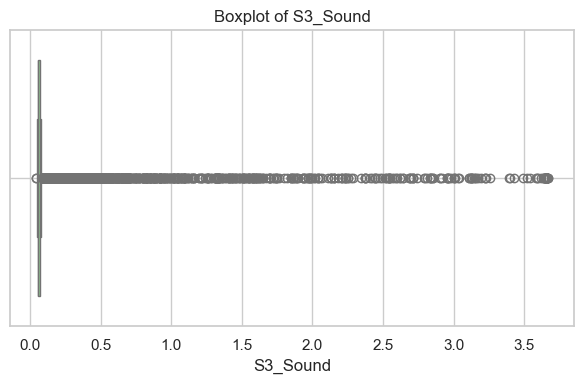

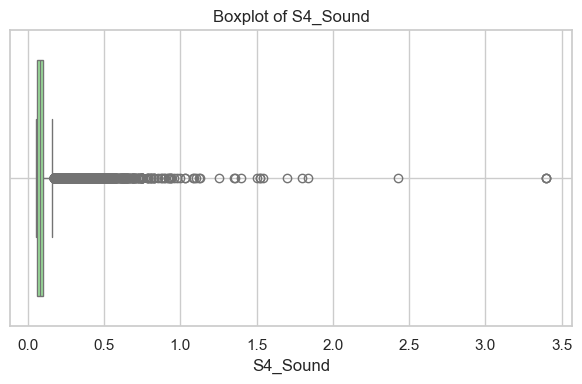

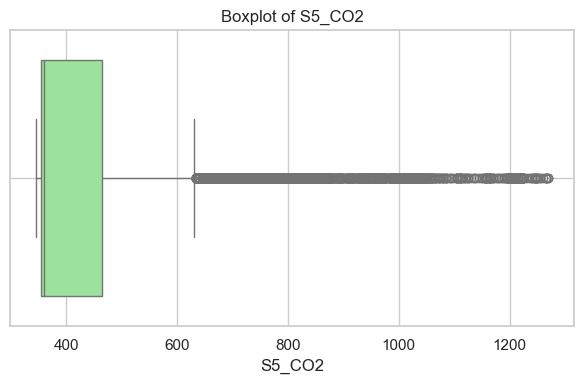

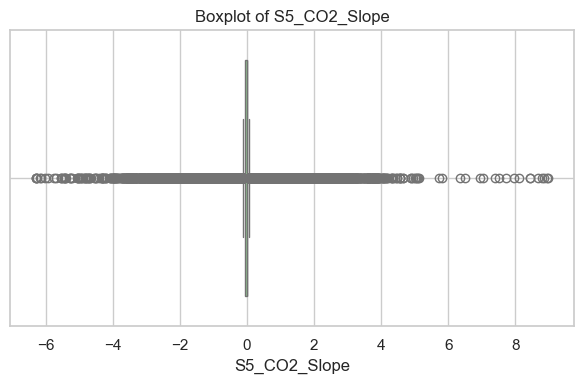

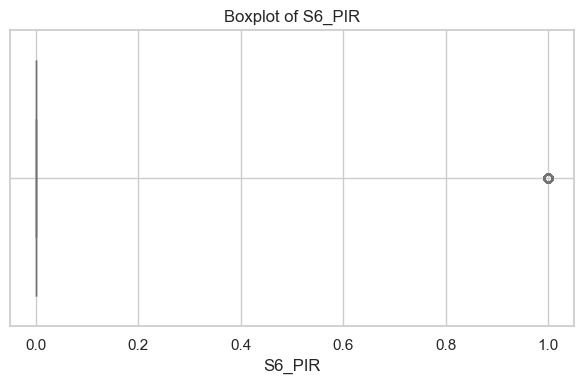

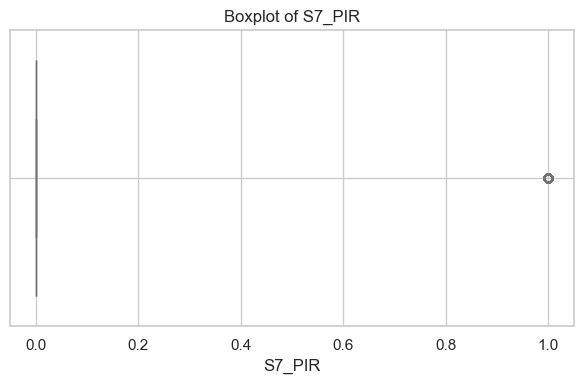

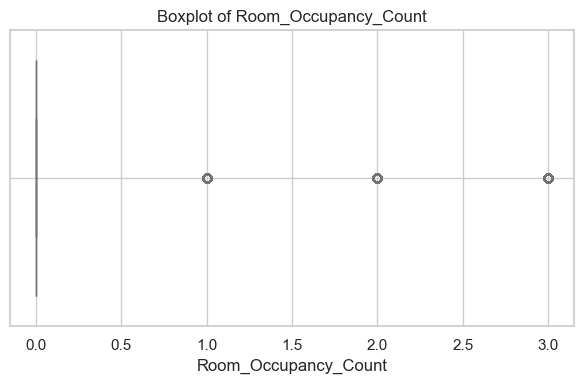

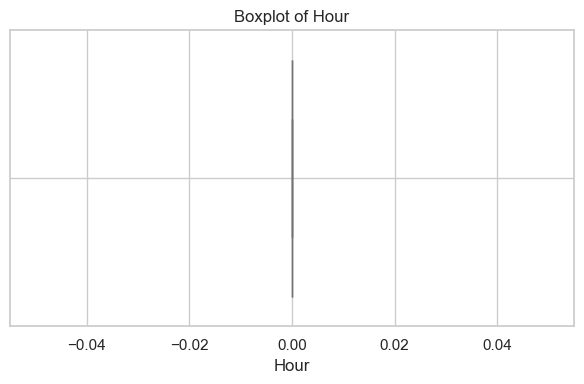

In [52]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Pairplot (Multivariate)

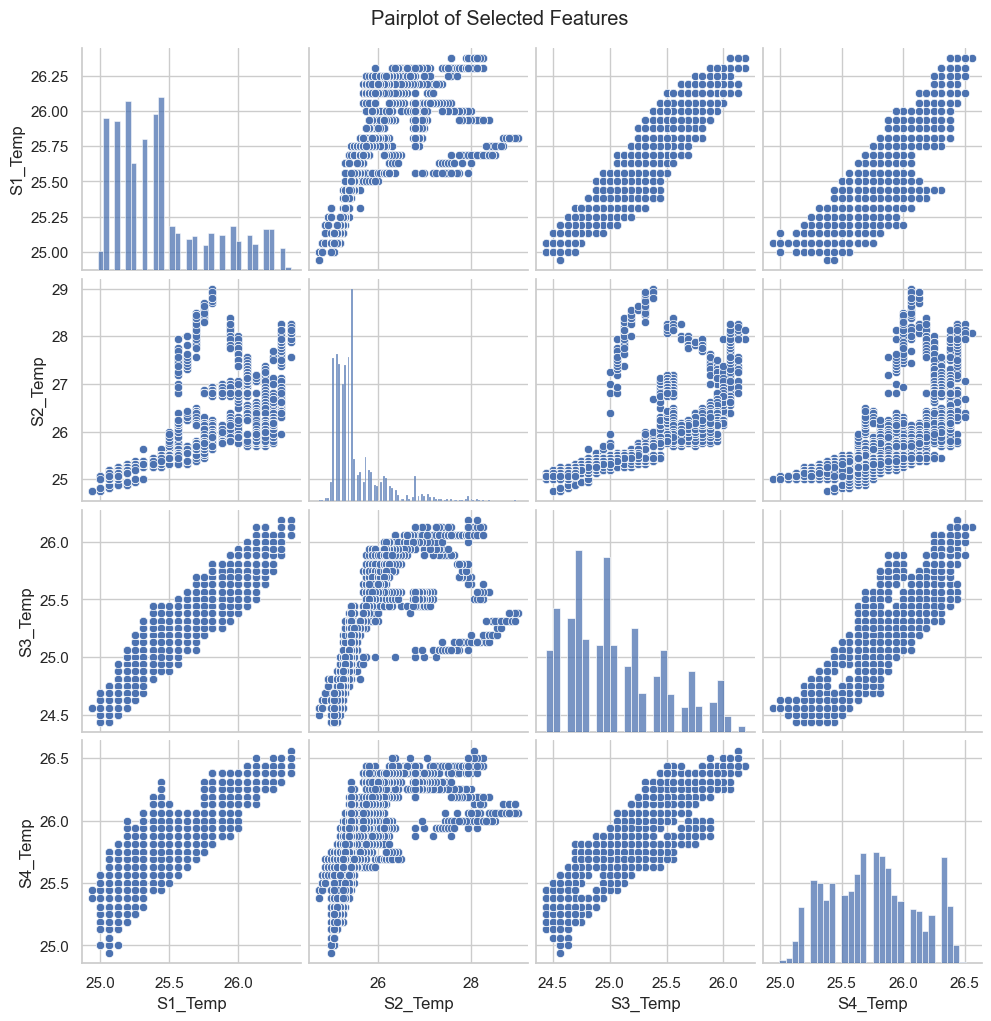

In [53]:
selected_cols = numerical_cols[:4]  # Select first 4 numerical columns
sns.pairplot(data[selected_cols])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


 Feature Importance (Tree-based)

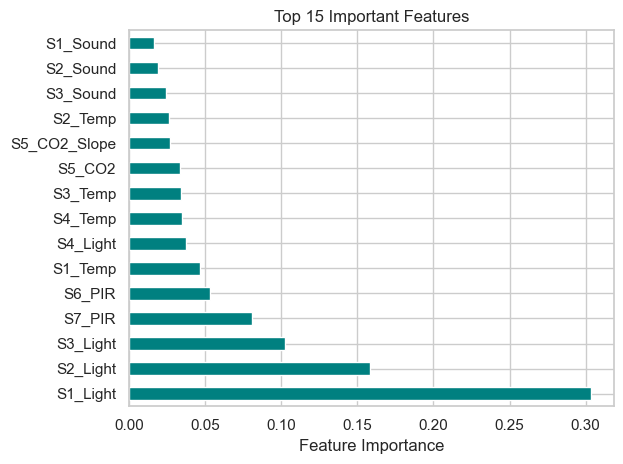

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Rename your dataset variable
df = data.copy()

# Define the actual target column
target_column = 'Room_Occupancy_Count'

# Drop rows with missing target if any
df_model = df.dropna(subset=[target_column])

# Drop columns that are not useful (like Date/Time strings)
df_model = df_model.drop(columns=['Date', 'Time', 'Datetime'], errors='ignore')

# One-hot encode categorical variables
X = pd.get_dummies(df_model.drop(target_column, axis=1), drop_first=True)
y = df_model[target_column]

# Train ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', color='teal')
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


This tells the model what you’re trying to predict.In this dataset, this column likely contains the number of people in the room.
X: This is feature matrix — all input variables (independent variables).
y: This is target vector — the thing you want to predict.This trains an ensemble tree model (similar to a random forest) to learn the relationship between features (X) and target (y).It is Useful because 
Model Interpretation: we know which features to keep or drop.
Feature Selection: we can reduce dimensionality and improve model performance.
Domain Insight: Helps us understand which environmental factors affect occupancy (e.g., temperature, light, CO₂).


Encoding Categorical Features

In [59]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Now apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [61]:
import pandas as pd
X = data.drop("Room_Occupancy_Count", axis=1)
y = data["Room_Occupancy_Count"]

print(X.describe())


                                Date       S1_Temp       S2_Temp  \
count                          10129  10129.000000  10129.000000   
mean   2017-12-27 08:26:49.319774720     25.454012     25.546059   
min              2017-12-22 00:00:00     24.940000     24.750000   
25%              2017-12-23 00:00:00     25.190000     25.190000   
50%              2017-12-24 00:00:00     25.380000     25.380000   
75%              2017-12-26 00:00:00     25.630000     25.630000   
max              2018-01-11 00:00:00     26.380000     29.000000   
std                              NaN      0.351351      0.586325   

            S3_Temp       S4_Temp      S1_Light     S2_Light      S3_Light  \
count  10129.000000  10129.000000  10129.000000  10129.00000  10129.000000   
mean      25.056621     25.754125     25.445059     26.01629     34.248494   
min       24.440000     24.940000      0.000000      0.00000      0.000000   
25%       24.690000     25.440000      0.000000      0.00000      0.000000 

In [63]:
print(data.columns)


Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count', 'Datetime', 'Hour'],
      dtype='object')


In [65]:
from sklearn.model_selection import train_test_split
X = data.drop("Room_Occupancy_Count", axis=1)
y = data["Room_Occupancy_Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}


In [69]:
def time_to_seconds(t):
    h, m, s = map(int, t.split(':'))
    return h * 3600 + m * 60 + s

X_train["Time_seconds"] = X_train["Time"].apply(time_to_seconds)
X_train = X_train.drop(columns=["Time"])


In [81]:
print(X.dtypes)


Date            datetime64[ns]
Time                    object
S1_Temp                float64
S2_Temp                float64
S3_Temp                float64
S4_Temp                float64
S1_Light                 int64
S2_Light                 int64
S3_Light                 int64
S4_Light                 int64
S1_Sound               float64
S2_Sound               float64
S3_Sound               float64
S4_Sound               float64
S5_CO2                   int64
S5_CO2_Slope           float64
S6_PIR                   int64
S7_PIR                   int64
Datetime        datetime64[ns]
Hour                     int32
dtype: object


In [87]:
# Drop datetime columns if any remain
for col in X.select_dtypes(include=['datetime64[ns]']).columns:
    X = X.drop(columns=[col])

# Convert 'Time' column if exists
if 'Time' in X.columns:
    X['Time'] = pd.to_datetime(X['Time'], errors='coerce')
    X['Time_hour'] = X['Time'].dt.hour
    X['Time_minute'] = X['Time'].dt.minute
    X['Time_second'] = X['Time'].dt.second
    X = X.drop(columns=['Time'])

# Final check: should be only numeric
print(X.dtypes)


S1_Temp         float64
S2_Temp         float64
S3_Temp         float64
S4_Temp         float64
S1_Light          int64
S2_Light          int64
S3_Light          int64
S4_Light          int64
S1_Sound        float64
S2_Sound        float64
S3_Sound        float64
S4_Sound        float64
S5_CO2            int64
S5_CO2_Slope    float64
S6_PIR            int64
S7_PIR            int64
Hour              int32
Time_hour         int32
Time_minute       int32
Time_second       int32
dtype: object


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
from sklearn.model_selection import cross_val_score

results = {}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Cross-validation (safe)
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        cv_mean = cv_scores.mean()
    except Exception as e:
        print(f"Cross-validation failed for {name}: {e}")
        cv_mean = "Not available"
    
    # ROC-AUC handling
    try:
        if len(np.unique(y)) == 2:  # Binary classification
            roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        else:  # Multiclass
            roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    except:
        roc = "Not available"
    
    metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Cross-Val Accuracy": cv_mean,
        "Precision": precision_score(y_test, y_pred_test, average='weighted'),
        "Recall": recall_score(y_test, y_pred_test, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_test, average='weighted'),
        "ROC-AUC": roc
    }
    
    results[name] = metrics
    
    # Print metrics
    for m, v in metrics.items():
        print(f"{m}: {v}")
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

# Store results in DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\n=== Summary of All Models ===")
print(results_df)





===== Logistic Regression =====


C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Train Accuracy: 0.9914846353202518
Test Accuracy: 0.9901283316880553
Cross-Val Accuracy: 0.9901271886733536
Precision: 0.9901088216167823
Recall: 0.9901283316880553
F1-score: 0.9901044695887878
ROC-AUC: 0.9968064725890848

Confusion Matrix:
[[1617    0    0    2]
 [   0  103    0    0]
 [   0    1  155    8]
 [   4    0    5  131]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.97      0.95      0.96       164
           3       0.93      0.94      0.93       140

    accuracy                           0.99      2026
   macro avg       0.97      0.97      0.97      2026
weighted avg       0.99      0.99      0.99      2026


===== Decision Tree =====
Train Accuracy: 1.0
Test Accuracy: 0.993583415597236
Cross-Val Accuracy: 0.9944465007882652
Precision: 0.9935527017617181
Recall: 0.993583415597236
F1-score: 0.9935627345331488
ROC

In [ ]:
from sklearn.linear_model import LogisticRegression

models["Logistic Regression"] = LogisticRegression(max_iter=1000)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

models["Logistic Regression"] = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)


 Summary of Your Results (before tuning):
 
Model	            Accuracy
LogisticRegression	0.9605
RandomForest	    0.9975
SVM	                0.8156
XGBoost	            0.9970

Hyperparameter Tuning (GridSearchCV / RandomizedSearchCV)

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9975319304498823


In [97]:
#Final Evaluation on Test Set
from sklearn.metrics import classification_report

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       1.00      0.99      1.00       140

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [99]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming X, y are already defined in the notebook
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define at least 5 algorithms
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluation Metrics
    metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test, average='weighted'),
        "Recall": recall_score(y_test, y_pred_test, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_test, average='weighted'),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) if len(np.unique(y))==2 else "N/A"
    }
    
    results[name] = metrics
    
    # Print metrics
    for m, v in metrics.items():
        print(f"{m}: {v}")
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

# Store results in DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\n=== Summary of All Models ===")
print(results_df)



===== Logistic Regression =====


C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.9914846353202518
Test Accuracy: 0.9901283316880553
Precision: 0.9901088216167823
Recall: 0.9901283316880553
F1-score: 0.9901044695887878
ROC-AUC: N/A

Confusion Matrix:
[[1617    0    0    2]
 [   0  103    0    0]
 [   0    1  155    8]
 [   4    0    5  131]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.97      0.95      0.96       164
           3       0.93      0.94      0.93       140

    accuracy                           0.99      2026
   macro avg       0.97      0.97      0.97      2026
weighted avg       0.99      0.99      0.99      2026


===== Decision Tree =====
Train Accuracy: 1.0
Test Accuracy: 0.993583415597236
Precision: 0.9935440250573697
Recall: 0.993583415597236
F1-score: 0.9935592301836511
ROC-AUC: N/A

Confusion Matrix:
[[1619    0    0    0]
 [   0  102    1    0]
 [   0    1  158  